In [2]:
from pathfinding.core.grid import Grid
from pathfinding.finder.a_star import AStarFinder
from pathfinding.core.diagonal_movement import DiagonalMovement
import matplotlib.pyplot as plt
import numpy as np
import cv2


In [5]:
prediction_path = r"C:\Users\jiric\Documents\VUT\BP\OBRAZKY\General\A star\PATH_M\pred_1.png"
save_path = r"C:\Users\jiric\Documents\VUT\BP\OBRAZKY\General\A star\found_path_1.jpg"

(1280, 1280) [0 1]


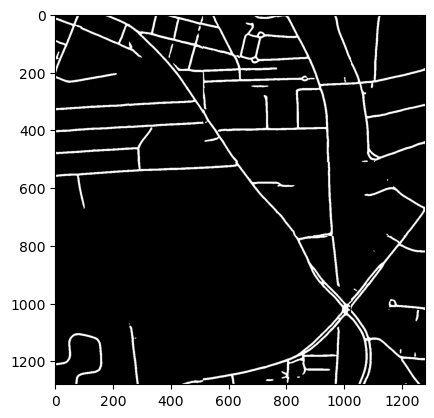

In [6]:
prediction = cv2.imread(prediction_path)

# Convert RGB tensor to grayscale
gray_image = cv2.cvtColor(prediction, cv2.COLOR_RGB2GRAY)

binary_matrix = np.array((gray_image > 125).astype(int))

print(binary_matrix.shape, np.unique(binary_matrix))

plt.imshow(binary_matrix, cmap='gray')
plt.show()

In [7]:
grid = Grid(matrix=binary_matrix)

start = grid.node(670, 31)
end = grid.node(1075, 628)
x_cor_se = [670, 1075]
y_cor_se = [31, 625]

# create a finder with the movement style
diag_move = DiagonalMovement.always
finder = AStarFinder(diagonal_movement=diag_move)

# returns a list with the path and the amount of times the finder had to run to get the path
path, runs = finder.find_path(start, end, grid)

In [8]:
formatted_coordinates = []
for path in path:
    coordinates = [int(coord) for coord in str(path).split("(")[1].split(" ")[0].split(":")]
    formatted_coordinates.append(coordinates)

x_coords = [coord[0] for coord in formatted_coordinates]
y_coords = [coord[1] for coord in formatted_coordinates]


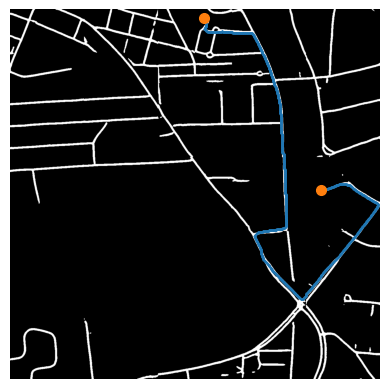

In [11]:
img_base = np.zeros([binary_matrix.shape[0], binary_matrix.shape[1],3]).astype(np.uint8)
img_base[binary_matrix == 0,:] = [0, 0, 0]
img_base[binary_matrix == 1,:] = [255, 255, 255]
plt.imshow(img_base)
plt.plot(x_coords, y_coords, marker='o', linestyle='', markersize=0.5)
plt.plot(x_cor_se, y_cor_se, marker='o', linestyle='', markersize=7)
plt.axis('off')
plt.savefig(save_path, pad_inches=0, dpi=200)

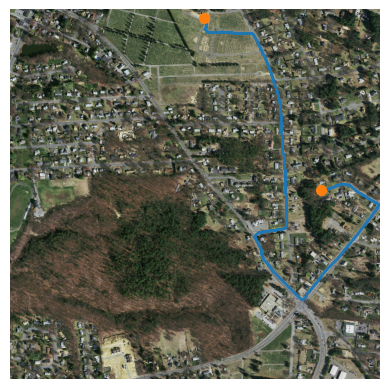

In [13]:
original = cv2.imread(r"C:\Users\jiric\Documents\VUT\BP\OBRAZKY\General\A star\PATH_M\img.jpg")
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
save2 = r"C:\Users\jiric\Documents\VUT\BP\OBRAZKY\General\A star\img_plus_path.jpg"
plt.imshow(original)
plt.plot(x_coords, y_coords, marker='o', linestyle='', markersize=0.5)
plt.plot(x_cor_se, y_cor_se, marker='o', linestyle='', markersize=7)
plt.axis('off')
plt.savefig(save2, pad_inches=0, dpi=200)
